## IMPORTANDO PACOTES E ARQUIVO

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from matplotlib import pyplot 
from google.colab import drive

In [ ]:
drive.mount('/content/drive', force_remount= True)

In [3]:
df = pd.read_csv('/content/drive/MyDrive/pasta x/DAY 6/nyflights.csv')

In [28]:
In [25]: pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [6]:
df.head()

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,1,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,3,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,4,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,5,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00


In [8]:
type(df['dep_delay'][0])

numpy.float64

## ETAPA 1 - Qual o comportamento médio e a variância dos dados dos voos que atrasam mais de duas horas?

### Filtrar a tabela com os registrados que atrasam mais de duas horas

In [15]:
#Criando coluna com voôs com atraso de saída de mais de 2 horas
df_atrasos = df[df['dep_delay'] > 120]
df_atrasos.head()

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
151,152,2013,1,1,848.0,1835,853.0,1001.0,1950,851.0,MQ,3944,N942MQ,JFK,BWI,41.0,184,18,35,2013-01-01 18:00:00
218,219,2013,1,1,957.0,733,144.0,1056.0,853,123.0,UA,856,N534UA,EWR,BOS,37.0,200,7,33,2013-01-01 07:00:00
268,269,2013,1,1,1114.0,900,134.0,1447.0,1222,145.0,UA,1086,N76502,LGA,IAH,248.0,1416,9,0,2013-01-01 09:00:00
491,492,2013,1,1,1540.0,1338,122.0,2020.0,1825,115.0,B6,705,N570JB,JFK,SJU,193.0,1598,13,38,2013-01-01 13:00:00
649,650,2013,1,1,1815.0,1325,290.0,2120.0,1542,338.0,EV,4417,N17185,EWR,OMA,213.0,1134,13,25,2013-01-01 13:00:00


In [17]:
df_atrasos = pd.DataFrame(df_atrasos)

In [14]:
df_atrasos.head()

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
151,152,2013,1,1,848.0,1835,853.0,1001.0,1950,851.0,MQ,3944,N942MQ,JFK,BWI,41.0,184,18,35,2013-01-01 18:00:00
218,219,2013,1,1,957.0,733,144.0,1056.0,853,123.0,UA,856,N534UA,EWR,BOS,37.0,200,7,33,2013-01-01 07:00:00
268,269,2013,1,1,1114.0,900,134.0,1447.0,1222,145.0,UA,1086,N76502,LGA,IAH,248.0,1416,9,0,2013-01-01 09:00:00
491,492,2013,1,1,1540.0,1338,122.0,2020.0,1825,115.0,B6,705,N570JB,JFK,SJU,193.0,1598,13,38,2013-01-01 13:00:00
649,650,2013,1,1,1815.0,1325,290.0,2120.0,1542,338.0,EV,4417,N17185,EWR,OMA,213.0,1134,13,25,2013-01-01 13:00:00


### Filtrar a coluna 'dep_delay'  e aplicar as funções describe() e .T


In [11]:
#Estatisticas descritivas do dataset
df_atrasos.describe()

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,9723.000000,9723.0,9723.000000,9723.000000,9723.000000,9723.000000,9723.000000,9637.000000,9723.000000,9597.000000,9723.000000,9597.000000,9723.000000,9723.000000,9723.000000
mean,188874.051836,2013.0,6.300627,15.563715,1750.786691,1613.244986,186.983236,1377.411850,1772.554356,183.001355,2277.703075,138.490570,956.457678,15.860023,27.242723
std,87520.888880,0.0,3.058476,8.739641,585.010628,389.242304,74.596836,900.204935,480.403889,77.519925,1780.367852,86.352965,682.818232,3.893360,18.816225
min,152.000000,2013.0,1.000000,1.000000,1.000000,500.000000,121.000000,1.000000,1.000000,57.000000,1.000000,21.000000,80.000000,5.000000,0.000000
25%,120654.000000,2013.0,4.000000,8.000000,1544.000000,1429.000000,139.000000,221.000000,1555.000000,134.000000,603.000000,77.000000,488.000000,14.000000,10.000000
50%,203539.000000,2013.0,6.000000,16.000000,1931.000000,1705.000000,166.000000,1755.000000,1910.000000,164.000000,1710.000000,118.000000,762.000000,17.000000,29.000000
75%,258522.000000,2013.0,8.000000,23.000000,2146.000000,1916.000000,210.000000,2150.000000,2125.000000,211.000000,4118.500000,162.000000,1096.000000,19.000000,43.000000
max,336764.000000,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,6181.000000,648.000000,4983.000000,23.000000,59.000000


In [23]:
#Transpondo o dataframe
df_transp = df_atrasos.describe().T

### Adicionar uma coluna para a amplitude


In [24]:
df_transp['range'] = df_transp['max'] - df_transp['min']

In [ ]:
df_transp

### Adicionar uma coluna para a variância

In [26]:
df_transp['var'] = pow(df_transp['std'], 2)

In [29]:
df_transp

,count,mean,std,min,25%,50%,75%,max,range,var
Unnamed: 0,9723.000,188874.052,87520.889,152.000,120654.000,203539.000,258522.000,336764.000,336612.000,7659905990.309
year,9723.000,2013.000,0.000,2013.000,2013.000,2013.000,2013.000,2013.000,0.000,0.000
month,9723.000,6.301,3.058,1.000,4.000,6.000,8.000,12.000,11.000,9.354
day,9723.000,15.564,8.740,1.000,8.000,16.000,23.000,31.000,30.000,76.381
dep_time,9723.000,1750.787,585.011,1.000,1544.000,1931.000,2146.000,2400.000,2399.000,342237.434
sched_dep_time,9723.000,1613.245,389.242,500.000,1429.000,1705.000,1916.000,2359.000,1859.000,151509.572
dep_delay,9723.000,186.983,74.597,121.000,139.000,166.000,210.000,1301.000,1180.000,5564.688
arr_time,9637.000,1377.412,900.205,1.000,221.000,1755.000,2150.000,2400.000,2399.000,810368.926
sched_arr_time,9723.000,1772.554,480.404,1.000,1555.000,1910.000,2125.000,2359.000,2358.000,230787.897
arr_delay,9597.000,183.001,77.520,57.000,134.000,164.000,211.000,1272.000,1215.000,6009.339


 ### Plotar um histograma e um boxplot com os dados da coluna 'dep_delay'

Text(0, 0.5, '')

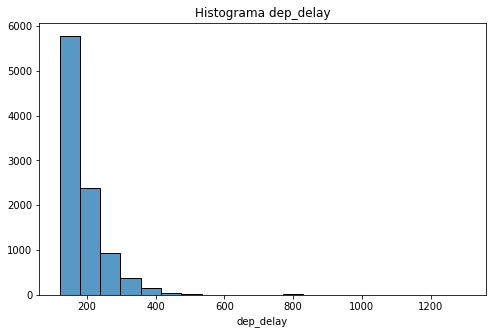

In [37]:
fig = plt.figure(figsize= [8,5])

sns.histplot(data=df_atrasos, x=df_atrasos['dep_delay'], bins = 20)

plt.title('Histograma dep_delay')
plt.ylabel('')

Text(0, 0.5, '')

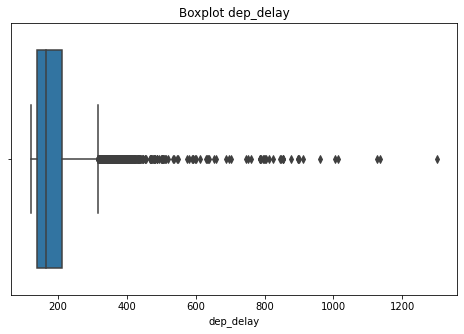

In [42]:
fig = plt.figure(figsize= [8,5])

sns.boxplot(data=df_atrasos,x=df_atrasos['dep_delay'])

plt.title('Boxplot dep_delay')
plt.ylabel('')

plt.show()

Com o histograma e o boxplot vemos muitos outliers e uma distribuição não normal

## ETAPA 2 - Quais destinos geraram voos com o maior número de atrasos na partida?



### Filtrar a tabela com os registrados que atrasam mais de 5 minutos

In [49]:
df_atrasos2 = df[df['dep_delay']>5]
df_atrasos2.head()

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
25,26,2013,1,1,608.000,600,8.000,807.000,735,32.000,MQ,3768,N9EAMQ,EWR,ORD,139.000,719,6,0,2013-01-01 06:00:00
26,27,2013,1,1,611.000,600,11.000,945.000,931,14.000,UA,303,N532UA,JFK,SFO,366.000,2586,6,0,2013-01-01 06:00:00
31,32,2013,1,1,623.000,610,13.000,920.000,915,5.000,AA,1837,N3EMAA,LGA,MIA,153.000,1096,6,10,2013-01-01 06:00:00
41,42,2013,1,1,632.000,608,24.000,740.000,728,12.000,EV,4144,N13553,EWR,IAD,52.000,212,6,8,2013-01-01 06:00:00
47,48,2013,1,1,644.000,636,8.000,931.000,940,-9.000,UA,1701,N75435,EWR,FLL,151.000,1065,6,36,2013-01-01 06:00:00


### Filtrar a coluna de destino, fazer uma contagem dos valores e apresentar os 5 últimos



In [82]:
df_5ultimos = pd.DataFrame(df_atrasos2['dest'].value_counts(ascending = True).head(5)).reset_index()

df_5ultimos.rename(columns = {'index':'Destino','dest':'Atrasos_num'}, inplace = True)

In [83]:
df_5ultimos

,Destino,Atrasos_num
0,ANC,3
1,PSP,3
2,EYW,6
3,SBN,6
4,MTJ,6


In [78]:
df_5atrasos = pd.DataFrame(df_atrasos2['dest'].value_counts().head(5)).reset_index()

df_5atrasos.rename(columns = {'index':'Destino','dest':'Atrasos_num'}, inplace = True)

### Filtrar a coluna de destino, fazer uma contagem dos valores e apresentar os 5 primeiros


In [79]:
df_5atrasos

,Destino,Atrasos_num
0,ORD,4975
1,ATL,4687
2,LAX,4442
3,MCO,4083
4,SFO,4078


### Plotar o gráfico dos valores agrupados por diferentes aeroportos  vs quantidade de atrasos

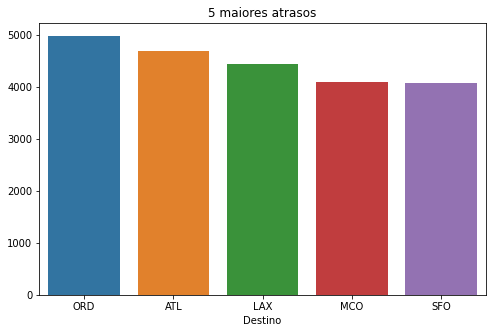

In [86]:
#Gráfico com 5 maiores atrasos
fig = plt.figure(figsize= [8,5])

sns.barplot(x= df_5atrasos['Destino'], y=df_5atrasos['Atrasos_num'])

plt.title('5 maiores atrasos')
plt.ylabel('')
plt.xlabel('Destino')

plt.show()

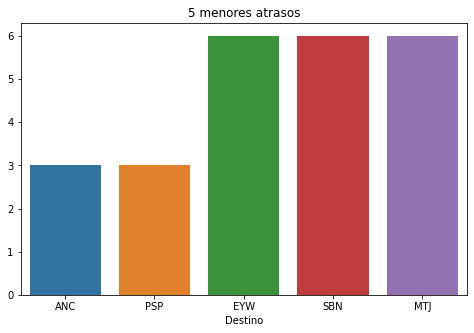

In [115]:
#Gráfico com 5 menores atrasos
fig = plt.figure(figsize= [8,5])

sns.barplot(x= df_5ultimos['Destino'], y=df_5ultimos['Atrasos_num'])

plt.title('5 menores atrasos')
plt.ylabel('')
plt.xlabel('Destino')

plt.show()

## ETAPA 3 - Quais são as velocidades médias dos voos nos 5 destinos que mais ocorrem atrasos

### Filtrar a tabela com os registrados que mais atrasam.

In [94]:
lista = ['ORD', 'ATL', 'LAX', 'MCO', 'SFO']
df_fim = df[df['dest'].isin(lista)]
df_fim.head()

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
4,5,2013,1,1,554.000,600,-6.000,812.000,837,-25.000,DL,461,N668DN,LGA,ATL,116.000,762,6,0,2013-01-01 06:00:00
5,6,2013,1,1,554.000,558,-4.000,740.000,728,12.000,UA,1696,N39463,EWR,ORD,150.000,719,5,58,2013-01-01 05:00:00
8,9,2013,1,1,557.000,600,-3.000,838.000,846,-8.000,B6,79,N593JB,JFK,MCO,140.000,944,6,0,2013-01-01 06:00:00
9,10,2013,1,1,558.000,600,-2.000,753.000,745,8.000,AA,301,N3ALAA,LGA,ORD,138.000,733,6,0,2013-01-01 06:00:00
12,13,2013,1,1,558.000,600,-2.000,924.000,917,7.000,UA,194,N29129,JFK,LAX,345.000,2475,6,0,2013-01-01 06:00:00


### Calcular a velocidade média

In [96]:
df_fim['vmedia'] = df_fim['distance']/(df_fim['air_time']/60)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [97]:
df_fim.head()

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,vmedia
4,5,2013,1,1,554.000,600,-6.000,812.000,837,-25.000,DL,461,N668DN,LGA,ATL,116.000,762,6,0,2013-01-01 06:00:00,394.138
5,6,2013,1,1,554.000,558,-4.000,740.000,728,12.000,UA,1696,N39463,EWR,ORD,150.000,719,5,58,2013-01-01 05:00:00,287.600
8,9,2013,1,1,557.000,600,-3.000,838.000,846,-8.000,B6,79,N593JB,JFK,MCO,140.000,944,6,0,2013-01-01 06:00:00,404.571
9,10,2013,1,1,558.000,600,-2.000,753.000,745,8.000,AA,301,N3ALAA,LGA,ORD,138.000,733,6,0,2013-01-01 06:00:00,318.696
12,13,2013,1,1,558.000,600,-2.000,924.000,917,7.000,UA,194,N29129,JFK,LAX,345.000,2475,6,0,2013-01-01 06:00:00,430.435


In [105]:
df_vmedia = df_fim[['dest','vmedia']].groupby('dest', as_index= False).mean()
df_vmedia

,dest,vmedia
0,ATL,405.182
1,LAX,452.799
2,MCO,422.386
3,ORD,381.130
4,SFO,448.542


###  Plotar o boxplot para os quatro piores destinos



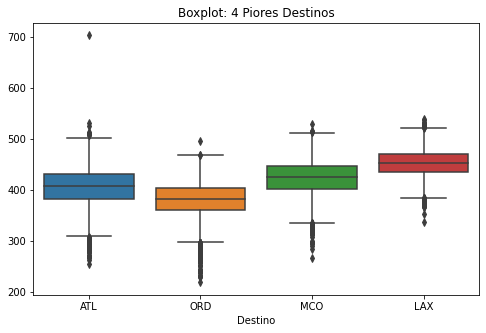

In [114]:
fig = plt.figure(figsize= [8,5])

ax = sns.boxplot(x=df_fim['dest'], y= df_fim['vmedia'], order = ('ATL', 'ORD', 'MCO', 'LAX'))

plt.title('Boxplot: 4 Piores Destinos')
plt.ylabel('')
plt.xlabel('Destino')

plt.show()